In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
 
class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz
 
    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)
 
def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''
 
    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)
 
setattr(Axes3D,'annotate3D',_annotate3D)
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)
 
    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)
 
        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
 
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''
 
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
 
setattr(Axes3D,'arrow3D',_arrow3D)
 

In [8]:
# リスト 7-1-(14)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def quad_func_1(v, A):
    return (np.dot(v, A) * v).sum(axis=1)
    #return np.dot(v, np.dot(A, v))
    

def show_3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(resolution, resolution)
    f = f.T
    ax.plot_surface(xx, yy, f, edgecolor=None, 
                    rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm)
    #ax.view_init(70, -110)
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    #ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=30)

    

In [9]:
jp_score = np.array([49, 58, 64, 65, 54, 58, 49, 67, 54, 66, 72, 66, 54, 64, 39, 
             56, 54, 56, 48, 57, 57, 47, 50, 60, 72, 54, 59, 61, 64, 70])

en_score = np.array([59, 63, 68, 77, 55, 71, 57, 79, 66, 81, 81, 77, 62, 67, 56,
             62, 70, 67, 61, 70, 68, 59, 61, 71, 77, 66, 70, 59, 68, 71])



In [10]:
mean_vector = np.array([jp_score.mean(), en_score.mean()])
data_matrix = np.c_[jp_score, en_score]
data_mean_reduced = data_matrix - mean_vector
covariance_matrix = np.dot(data_mean_reduced.T, data_mean_reduced) / len(jp_score)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
sorted_index = eigen_values.argsort()[::-1] 
eigen_values=eigen_values[sorted_index]
eigen_vectors=eigen_vectors[:, sorted_index]

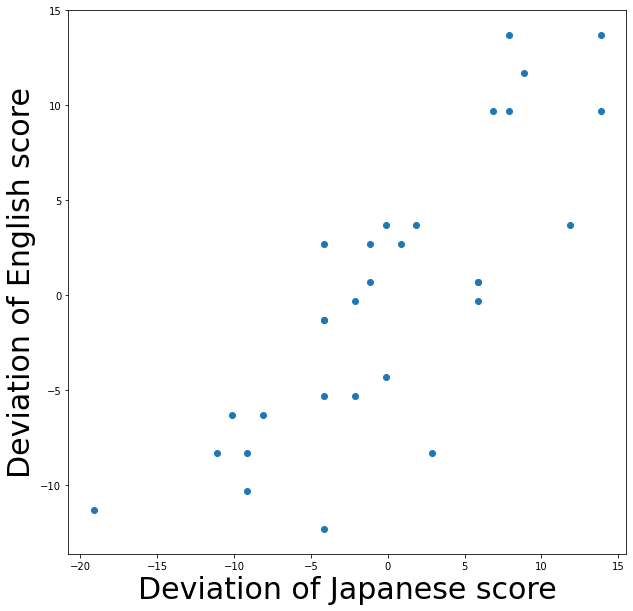

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(data_mean_reduced[:, 0], data_mean_reduced[:, 1])
plt.xlabel("Deviation of Japanese score", fontsize=30)
plt.ylabel("Deviation of English score", fontsize=30)
plt.show()

In [12]:
resolution = 100
x_scale = 10
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 10
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)
#x = np.c_[np.reshape(xx, resolution * resolution, 1), np.reshape(yy, xn * xn, 1)]
x = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]


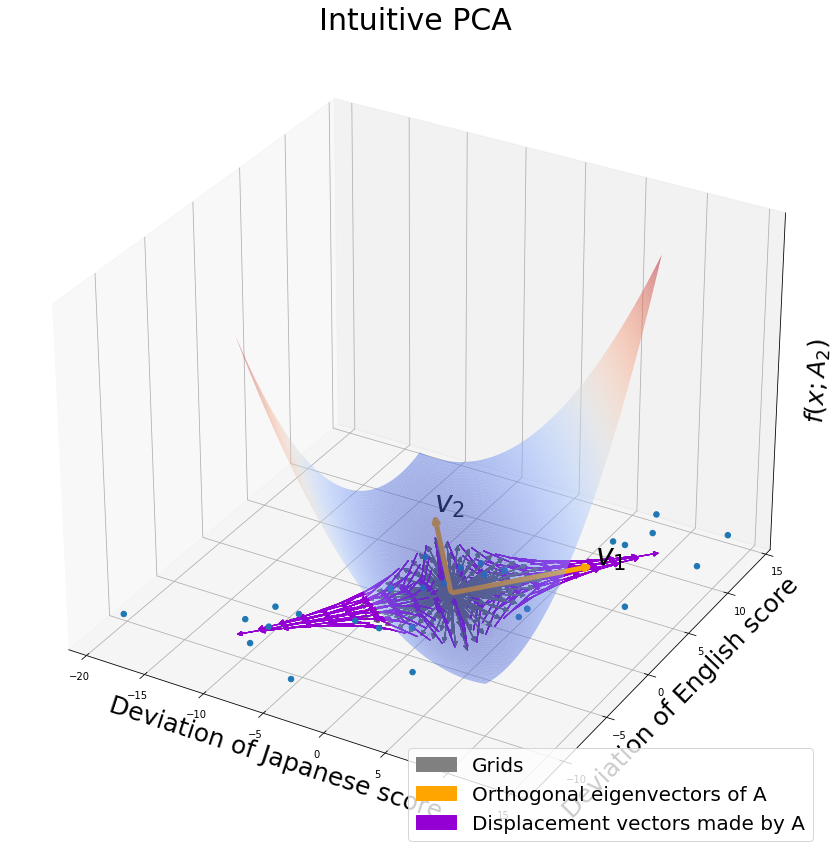

In [13]:


A = covariance_matrix/50
T_A = np.zeros((3, 3))
T_A[:A.shape[0], :A.shape[1]]  = A

eigen_values, U = np.linalg.eig(A)

const_range = 5
 
X = np.arange(-const_range, const_range + 1, 1)
Y = np.arange(-const_range, const_range + 1, 1)
Z = np.zeros(X.shape)
 
U_x, U_y, U_z = np.meshgrid(X, Y, Z)
 
V_x = np.zeros((len(U_x), len(U_y), len(U_z)))
V_y = np.zeros((len(U_x), len(U_y), len(U_z)))
V_z = np.zeros((len(U_x), len(U_y), len(U_z)))
 
temp_vec = np.zeros((1, 3))
 
W_x = np.zeros((len(U_x), len(U_y), len(U_z)))
W_y = np.zeros((len(U_x), len(U_y), len(U_z)))
W_z = np.zeros((len(U_x), len(U_y), len(U_z)))
 

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
grid_range = const_range + 5
#ax.set_xlim(-grid_range, grid_range)
#ax.set_ylim(-grid_range, grid_range)
#ax.set_zlim(-grid_range, grid_range)
B = A
show_3d(ax, quad_func_1(x, B), [0, 1000], 'Intuitive PCA')
    
for i in range(len(eigen_vectors)):
    if(eigen_vectors.T[i][0] < 0):
        eigen_vectors.T[i] = - eigen_vectors.T[i]
 
for i in range(len(U_x)):
    for j in range(len(U_x)):
        for k in range(len(U_x)):
            temp_vec[0][0] = U_x[i][j][k]
            temp_vec[0][1] = U_y[i][j][k]
            temp_vec[0][2] = U_z[i][j][k]
        
            temp_vec[0] = np.dot(T_A, temp_vec[0])
        
            V_x[i][j][k] = temp_vec[0][0]
            V_y[i][j][k] = temp_vec[0][1]
            V_z[i][j][k] = temp_vec[0][2]
        
            W_x[i][j][k] = V_x[i][j][k] - U_x[i][j][k]
            W_y[i][j][k] = V_y[i][j][k] - U_y[i][j][k]
            W_z[i][j][k] = V_z[i][j][k] - U_z[i][j][k]
            ax.arrow3D(0, 0, 0, 
                       U_x[i][j][k], U_y[i][j][k], U_z[i][j][k], 
                       mutation_scale=10, arrowstyle="-|>", fc='dimgrey', ec='dimgrey')

            ax.arrow3D(U_x[i][j][k], U_y[i][j][k], U_z[i][j][k], 
                       W_x[i][j][k], W_y[i][j][k], W_z[i][j][k],
                       mutation_scale=10, arrowstyle="-|>", fc='darkviolet', ec='darkviolet')


 
grey_patch = mpatches.Patch(color='grey', label='Grids')
orange_patch = mpatches.Patch(color='orange', label='Orthogonal eigenvectors of A')
purple_patch = mpatches.Patch(color='darkviolet', label='Displacement vectors made by A')
plt.legend(handles=[grey_patch, orange_patch, purple_patch], fontsize=20, loc='lower right')
 
    
vector_size = 10
    
ax.arrow3D(0, 0, 0, U.T[0][0]*vector_size, U.T[0][1]*vector_size, 0,
                       mutation_scale=10, lw=5, arrowstyle="-|>", fc='orange', ec='orange')
ax.arrow3D(0, 0, 0, U.T[1][0]*vector_size, U.T[1][1]*vector_size, 0,
                       mutation_scale=10, lw=5, arrowstyle="-|>", fc='orange', ec='orange')

ax.text(U.T[0][0]*vector_size , U.T[0][1]*vector_size, 0, r'$v_1$', fontsize=30)
ax.text(U.T[1][0]*vector_size , U.T[1][1]*vector_size, 0, r'$v_2$', fontsize=30)

ax.scatter(data_mean_reduced[:, 0], data_mean_reduced[:, 1], np.zeros(len(jp_score)), s=30, alpha=1)
    
ax.set_xlabel('Deviation of Japanese score', fontsize=25)
ax.set_ylabel('Deviation of English score', fontsize=25)
ax.set_zlabel(r'$f(x;A_2)$', fontsize=25)
ax.set_zticks([])
#plt.savefig("symmetric_positive_definite_visualizaiton.png")
plt.show()